# Mini Project
#### Group 10

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.dates as mdates
import matplotlib.pylab as plt
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import tkinter as tk

import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas_ta  as ta #pip install pandas-ta


In [2]:
AppleData = pd.read_csv('AAPL.csv')
AppleData['Date'] = pd.to_datetime(AppleData['Date'], format="%m/%d/%Y")
AppleData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


In [3]:
AppleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10272 non-null  datetime64[ns]
 1   Open       10272 non-null  float64       
 2   High       10272 non-null  float64       
 3   Low        10272 non-null  float64       
 4   Close      10272 non-null  float64       
 5   Adj Close  10272 non-null  float64       
 6   Volume     10272 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 561.9 KB


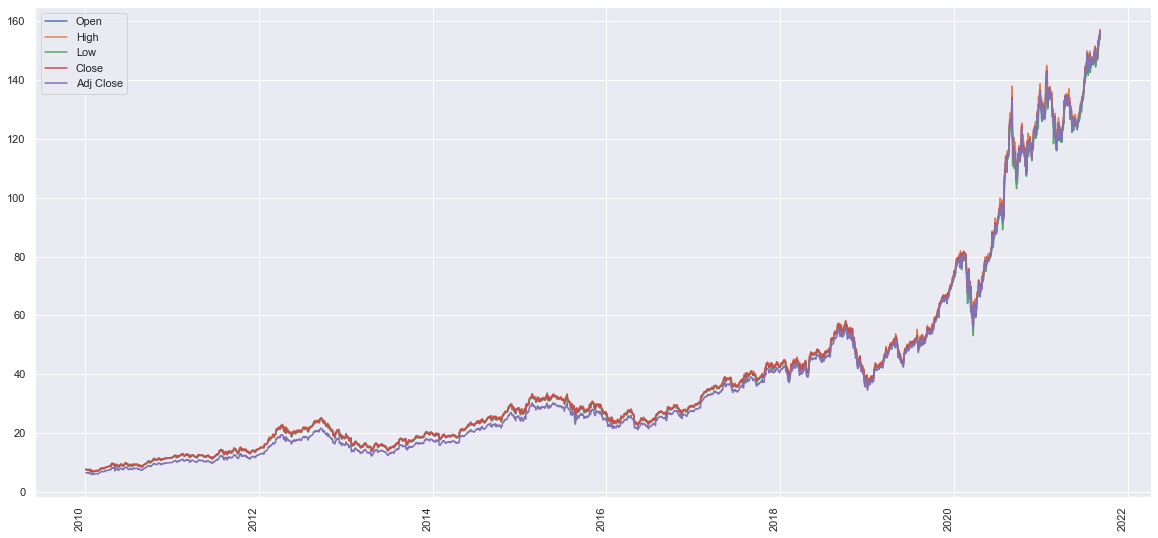

In [4]:
#filter data part
apo = AppleData
AppleData = AppleData[(AppleData['Date'] > '01/01/2010')]

ap = AppleData[["Date","Open","High","Low","Close","Adj Close"]]#.tail(10)

#ax = ap.set_index('Date').plot(x_compat=True,figsize=(20, 10))

ap.set_index('Date', inplace = True)
ap.index = pd.to_datetime(ap.index).date
ax = ap.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xticks(rotation=90);


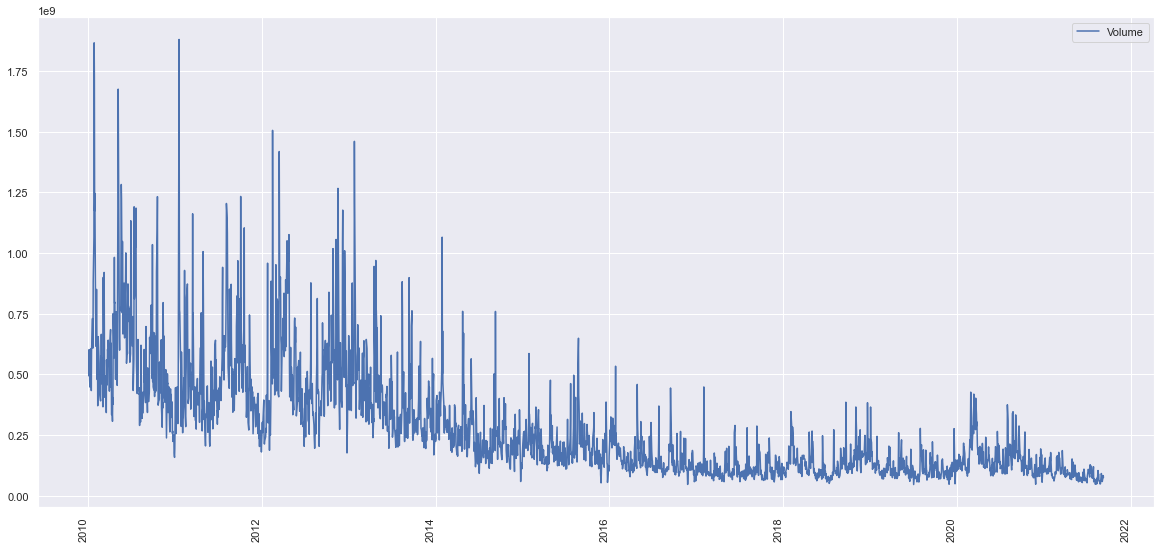

In [5]:
apv = AppleData[["Date","Volume"]]#.tail(100)

#ax = ap.set_index('Date').plot(x_compat=True,figsize=(20, 10))

apv.set_index('Date', inplace = True)
apv.index = pd.to_datetime(apv.index).date
ax = apv.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xticks( rotation=90);

In [6]:
AppleData.corr(method ='pearson')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999890,0.999843,0.999739,0.999620,-0.481545
High,0.999890,1.000000,0.999803,0.999864,0.999755,-0.479776
Low,0.999843,0.999803,1.000000,0.999865,0.999746,-0.484592
Close,0.999739,0.999864,0.999865,1.000000,0.999885,-0.482303
Adj Close,0.999620,0.999755,0.999746,0.999885,1.000000,-0.481296
Volume,-0.481545,-0.479776,-0.484592,-0.482303,-0.481296,1.000000


## Getting NewsData

In [7]:
import http.client
import requests
from urllib.request import Request, urlopen
import json

import pandas as pd

from pathlib import Path 

In [183]:
url = "https://google-news1.p.rapidapi.com/search"

querystring = {"q":"Apple","country":"US","lang":"en","before":"2021-10-10","after":"2021-09-08"}

headers = {
	"X-RapidAPI-Host": "google-news1.p.rapidapi.com",
	"X-RapidAPI-Key": "60ba6c2c8emsha8a15e53ec84acdp14aeb3jsncd684f9e15bd"
}

response = requests.request("GET", url, headers=headers, params=querystring)
x = response.text

In [184]:
data = json.loads(x)
News_Test = pd.json_normalize(data["articles"])
#News_Test.head()

#### Apple News data from 1/1/2013 - 9/8/2019

In [8]:
News_Train = pd.read_csv('AppleNewsStock.csv/APPLNEWS_TRAIN.csv')
News_Train.head()

,published_date,Date,title,link
0,2013-01-01T08:00:00+00:00,1/1/2013,Developers Seeing New Apple iPhone Hardware an...,https://thenextweb.com/news/developers-begin-s...
1,2013-01-02T08:00:00+00:00,1/2/2013,Life After The iPhone: How AT&T's Bet On Apple...,https://www.forbes.com/sites/connieguglielmo/2...
2,2013-01-02T08:00:00+00:00,1/2/2013,Apple's Foray into China - and the Mind of the...,https://knowledge.wharton.upenn.edu/article/ap...
3,2013-01-02T08:00:00+00:00,1/2/2013,Brazen Apple Store Robberies Bracket 2012 - Re...,https://readwrite.com/2013/01/02/brazen-apple-...
4,2013-01-02T08:00:00+00:00,1/2/2013,What needs to happen for Apple to turn its wat...,https://9to5mac.com/2013/01/02/what-needs-to-h...


#### Apple News data from 9/8/2021 - 10/8/2021

In [9]:
News_Test = pd.read_csv('AppleNewsStock.csv/APPLNEWS_TEST.csv',encoding='cp1252')
News_Test.head()

,published_date,Date,title,link
0,2021-09-08T07:00:00+00:00,9/8/2021,"New iPhones Are Coming. Apple Stock Is a Buy, ...",https://www.barrons.com/articles/new-iphones-a...
1,2021-09-08T07:00:00+00:00,9/8/2021,Apple App Store Changes Fail to Stem Push for ...,https://www.bloomberg.com/news/articles/2021-0...
2,2021-09-09T07:00:00+00:00,9/9/2021,Apple fires senior engineering program manager...,https://www.theverge.com/2021/9/9/22666049/app...
3,2021-09-09T07:00:00+00:00,9/9/2021,Apple may have solved bending batteries for th...,https://appleinsider.com/articles/21/09/09/app...
4,2021-09-09T07:00:00+00:00,9/9/2021,Apple Watch Chief Kevin Lynch Now Leading Appl...,https://www.macrumors.com/2021/09/09/kevin-lyn...


### Cleaning News data





In [10]:
News_Train = News_Train[News_Train['title'].str.contains('apple|iphone|ipad', case=False, na=False,regex=True)]
News_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8375 entries, 0 to 8898
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   published_date  8375 non-null   object
 1   Date            8375 non-null   object
 2   title           8375 non-null   object
 3   link            8375 non-null   object
dtypes: object(4)
memory usage: 327.1+ KB


### Classify article with News data

#### Why?

https://www.lehnerinvestments.com/en/sentiment-analysis-stock-market-sentiment/

#### effective?

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8053016/

##### with  Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing
https://www.nltk.org/index.html

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664#:~:text=VADER%20





In [11]:
import nltk #pip install --user -U nltk
#nltk.download('vader_lexicon') #use this one too

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [12]:
pd.options.mode.chained_assignment = None  # default='warn'
News_Train['scores'] = News_Train['title'].apply(lambda News: sid.polarity_scores(News))
News_Train['compound']  = News_Train['scores'].apply(lambda score_dict: score_dict['compound'])
News_Train['comp_score'] = News_Train['compound'].apply(lambda c: 'pos' if c > 0  else ('neg' if c < 0 else 'neu') )
News_Train = News_Train[News_Train['comp_score']!='neu']
News_Train

,published_date,Date,title,link,scores,compound,comp_score
5,2013-01-02T08:00:00+00:00,1/2/2013,Court Rejects Apple’s False Advertising Claim ...,https://techcrunch.com/2013/01/02/court-reject...,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'comp...",-0.4939,neg
9,2013-01-03T08:00:00+00:00,1/3/2013,Apple said 'no thanks' to cellular Newton PDA ...,https://appleinsider.com/articles/13/01/03/app...,"{'neg': 0.182, 'neu': 0.579, 'pos': 0.24, 'com...",0.1779,pos
12,2013-01-06T08:00:00+00:00,1/6/2013,Providing a Template to Challenge Apple - The ...,https://www.nytimes.com/2013/01/07/technology/...,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",0.0772,pos
14,2013-01-09T08:00:00+00:00,1/9/2013,Hard To Imagine Steve Jobs Running Apple This ...,https://www.forbes.com/sites/greatspeculations...,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",-0.1027,neg
16,2013-01-10T08:00:00+00:00,1/10/2013,"The Apple economy dominates CES 2013, but Sams...",https://www.theverge.com/2013/1/10/3862034/the...,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.0258,pos
...,...,...,...,...,...,...,...
8876,2021-09-01T07:00:00+00:00,2021-09-01,Apple announces first states to adopt driver's...,https://www.apple.com/newsroom/2021/09/apple-a...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp...",0.1779,pos
8879,2021-09-01T07:00:00+00:00,2021-09-01,Today at Apple Creative Studios expands to Chi...,https://www.apple.com/newsroom/2021/09/today-a...,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'comp...",0.5106,pos
8888,2021-09-03T07:00:00+00:00,2021-09-03,Apple Delays Rollout of Controversial Child Sa...,https://www.macrumors.com/2021/09/03/apple-del...,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",-0.2023,neg
8890,2021-09-03T07:00:00+00:00,2021-09-03,Apple relaxes App Store rules for services suc...,https://edition.cnn.com/2021/09/02/tech/apple-...,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",0.3612,pos


In [13]:
#combine data
d = AppleData
d['rtx'] = d['Adj Close'].pct_change(1).mul(100)

#combine data
d['Date'] = pd.to_datetime(d.Date)
News_Train['Date'] = pd.to_datetime(News_Train.Date)

#Left join
d = d.merge(News_Train, how='left', on='Date')
d = d.dropna(subset=['comp_score'])

d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 754 to 4140
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2601 non-null   datetime64[ns]
 1   Open            2601 non-null   float64       
 2   High            2601 non-null   float64       
 3   Low             2601 non-null   float64       
 4   Close           2601 non-null   float64       
 5   Adj Close       2601 non-null   float64       
 6   Volume          2601 non-null   int64         
 7   rtx             2601 non-null   float64       
 8   published_date  2601 non-null   object        
 9   title           2601 non-null   object        
 10  link            2601 non-null   object        
 11  scores          2601 non-null   object        
 12  compound        2601 non-null   float64       
 13  comp_score      2601 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(5)


## Pred Range News test categorize

In [14]:
#pred range data
Real=pd.read_csv('AAPLTest.csv')
Arima=pd.read_csv('ARIMAPricePrediction.csv')
LSTM=pd.read_csv('LSTMAPPLEPrediction.csv')
Real['rtx'] = Real['Adj Close'].pct_change(1).mul(100)
Arima['rtx'] = Arima['Adj Close'].pct_change(1).mul(100)
LSTM['rtx'] = LSTM['Adj Close'].pct_change(1).mul(100)


In [15]:
pd.options.mode.chained_assignment = None  # default='warn'
News_Test['scores'] = News_Test['title'].apply(lambda News: sid.polarity_scores(News))
News_Test['compound']  = News_Test['scores'].apply(lambda score_dict: score_dict['compound'])
News_Test['comp_score'] = News_Test['compound'].apply(lambda c: 'pos' if c > 0  else ('neg' if c < 0 else 'neu') )
News_Test = News_Test[News_Test['comp_score']!='neu']

News_Test#.head()

,published_date,Date,title,link,scores,compound,comp_score
1,2021-09-08T07:00:00+00:00,9/8/2021,Apple App Store Changes Fail to Stem Push for ...,https://www.bloomberg.com/news/articles/2021-0...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.5423,neg
3,2021-09-09T07:00:00+00:00,9/9/2021,Apple may have solved bending batteries for th...,https://appleinsider.com/articles/21/09/09/app...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.2732,pos
7,2021-09-10T07:00:00+00:00,9/10/2021,Several Apple Products Currently Experiencing ...,https://www.macrumors.com/2021/09/10/apple-pro...,"{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'comp...",-0.2263,neg
9,2021-09-11T07:00:00+00:00,9/11/2021,Apple @ Work: Here’s why Apple Apple’s growth ...,https://9to5mac.com/2021/09/11/apples-continue...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.3818,pos
10,2021-09-12T07:00:00+00:00,9/12/2021,Apple still reliant on one core product as it ...,https://www.theguardian.com/technology/2021/se...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.1280,pos
17,2021-09-14T07:00:00+00:00,9/14/2021,Apple Fitness+ expands availability; adds new ...,https://www.apple.com/newsroom/2021/09/apple-f...,"{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'comp...",0.1027,pos
23,2021-09-14T07:00:00+00:00,9/14/2021,FlickType developer suing Apple over Apple Wat...,https://appleinsider.com/articles/21/09/14/fli...,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",-0.2732,neg
25,2021-09-15T07:00:00+00:00,9/15/2021,Apple fixes security flaw that apparently affe...,https://www.cbsnews.com/news/iphone-hack-apple...,"{'neg': 0.107, 'neu': 0.733, 'pos': 0.16, 'com...",0.2023,pos
28,2021-09-16T07:00:00+00:00,9/16/2021,Old video about Apple update unrelated to new ...,https://www.politifact.com/factchecks/2021/sep...,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.3400,pos
29,2021-09-16T07:00:00+00:00,9/16/2021,Apple’s challenge now: innovation at scale - C...,https://www.computerworld.com/article/3633633/...,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.4404,pos


In [16]:
#combine data
Real['Date'] = pd.to_datetime(Real.Date)
Arima['Date'] = pd.to_datetime(Arima.Date)
LSTM['Date'] = pd.to_datetime(LSTM.Date)

News_Test['Date'] = pd.to_datetime(News_Test.Date)

#Left join
Real = Real.merge(News_Test, how='left', on='Date')
Real = Real.dropna(subset=['comp_score'])
Arima = Arima.merge(News_Test, how='left', on='Date')
Arima = Arima.dropna(subset=['comp_score'])
LSTM = LSTM.merge(News_Test, how='left', on='Date')
LSTM = LSTM.dropna(subset=['comp_score'])

# Create a Decision Tree Classifier object
dectree2 = DecisionTreeClassifier(max_depth = 2)
dectree4 = DecisionTreeClassifier(max_depth = 4)

In [17]:
def Degree2():
    print("Degree2\n")
    dectree2.fit(x_train,y_train)

    f = plt.figure(figsize=(12,12))
    plot_tree(dectree2, filled=True, rounded=True, 
              feature_names=["Value"], 
              class_names=["Neg","Pos"])

    # Predict Legendary values corresponding to Total
    y_train_pred = dectree2.predict(x_train)
    y_test_pred = dectree2.predict(x_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree2.score(x_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
    print()
    
    print()
    cftr = confusion_matrix(y_train, y_train_pred)
    tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
    fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
    print("Train set")
    print("True Positive Rate \t: ", tp)
    print("False Positive Rate \t: ", fp)

    cftr = confusion_matrix(y_test, y_test_pred)
    tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
    fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
    print("Train set")
    print("True Positive Rate \t: ", tp)
    print("False Positive Rate \t: ", fp)

def Degree4():
    print("\nDegree4\n")
    dectree4.fit(x_train,y_train)

    f = plt.figure(figsize=(24,24))
    plot_tree(dectree4, filled=True, rounded=True, 
              feature_names=["Value"], 
              class_names=["Neg","Pos"])

    # Predict Legendary values corresponding to Total
    y_train_pred = dectree4.predict(x_train)
    y_test_pred = dectree4.predict(x_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree2.score(x_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
    print()
    
    
    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    print()
    cftr = confusion_matrix(y_train, y_train_pred)
    tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
    fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
    print("Train set")
    print("True Positive Rate \t: ", tp)
    print("False Positive Rate \t: ", fp)

    cftr = confusion_matrix(y_test, y_test_pred)
    tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
    fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
    print("Train set")
    print("True Positive Rate \t: ", tp)
    print("False Positive Rate \t: ", fp)



Train Set : (164, 1) (164, 1)
Test Set  : (41, 1) (41, 1)

Degree2

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6097560975609756

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5609756097560976


Train set
True Positive Rate 	:  0.6020408163265306
False Positive Rate 	:  0.3787878787878788
Train set
True Positive Rate 	:  0.3333333333333333
False Positive Rate 	:  0.11764705882352941

Degree4

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6097560975609756

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5609756097560976


Train set
True Positive Rate 	:  0.7244897959183674
False Positive Rate 	:  0.3484848484848485
Train set
True Positive Rate 	:  0.3333333333333333
False Positive Rate 	:  0.11764705882352941


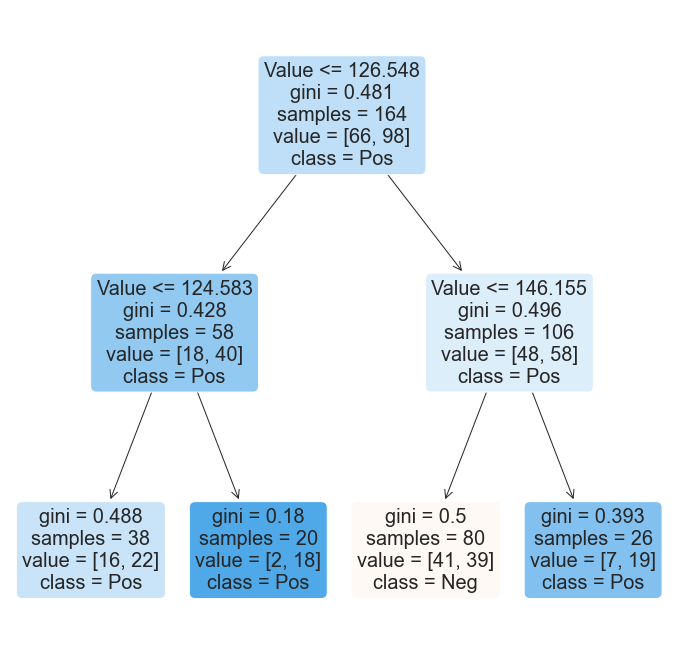

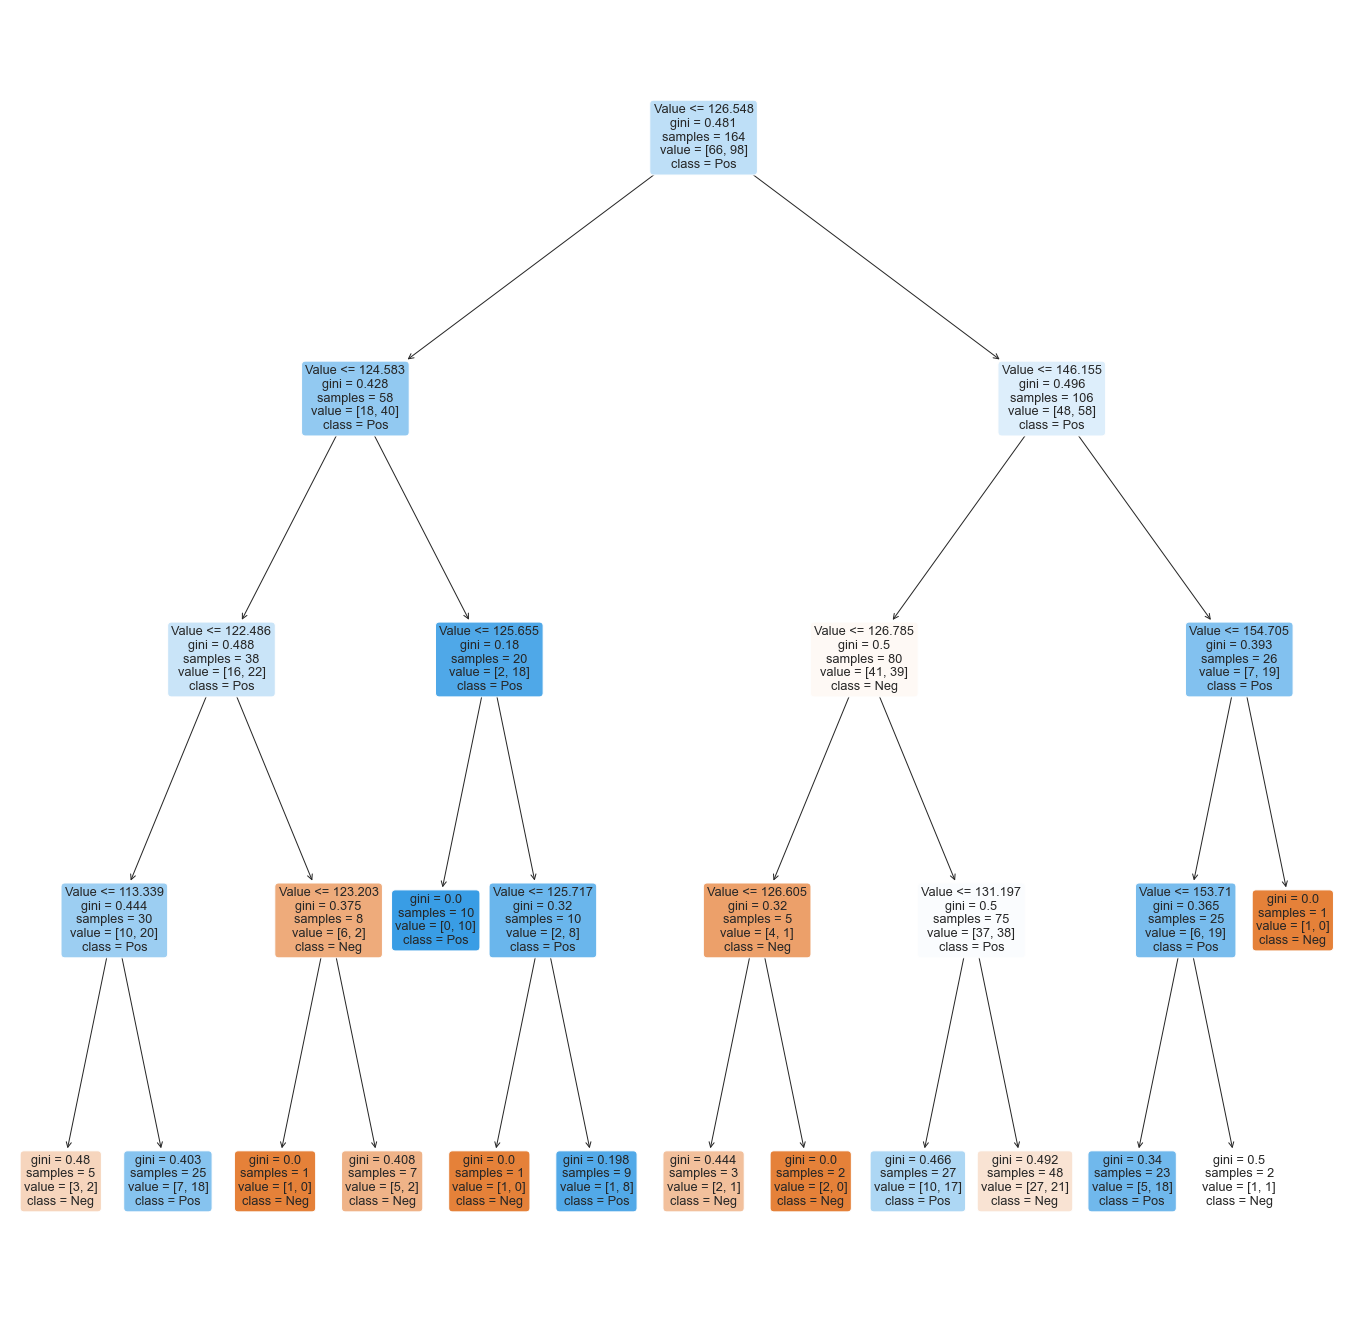

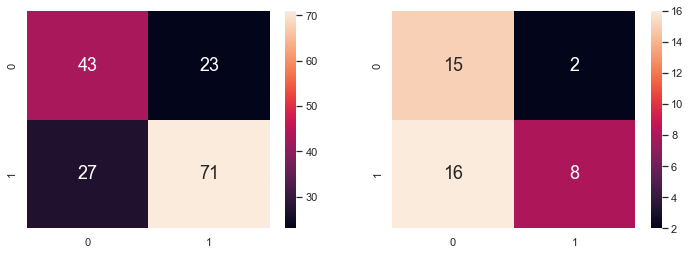

In [20]:
pred = Real
#to match the output we reduce the train size
d = d.iloc[-164:]

x_train = pd.DataFrame(d['Adj Close'])
x_test = pd.DataFrame(pred['Adj Close'])
y_train = pd.DataFrame(d['comp_score'])
y_test = pd.DataFrame(pred['comp_score'])



# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)
print()
Degree2()
Degree4()

Train Set : (164, 1) (164, 1)
Test Set  : (41, 1) (41, 1)

Degree2

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6097560975609756

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5853658536585366


Train set
True Positive Rate 	:  0.6020408163265306
False Positive Rate 	:  0.3787878787878788
Train set
True Positive Rate 	:  1.0
False Positive Rate 	:  1.0

Degree4

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6097560975609756

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5853658536585366


Train set
True Positive Rate 	:  0.7244897959183674
False Positive Rate 	:  0.3484848484848485
Train set
True Positive Rate 	:  0.0
False Positive Rate 	:  0.0


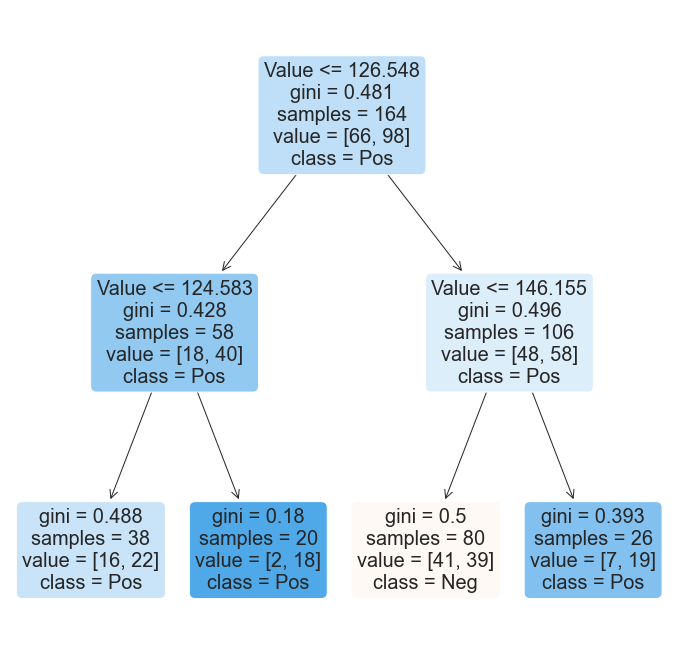

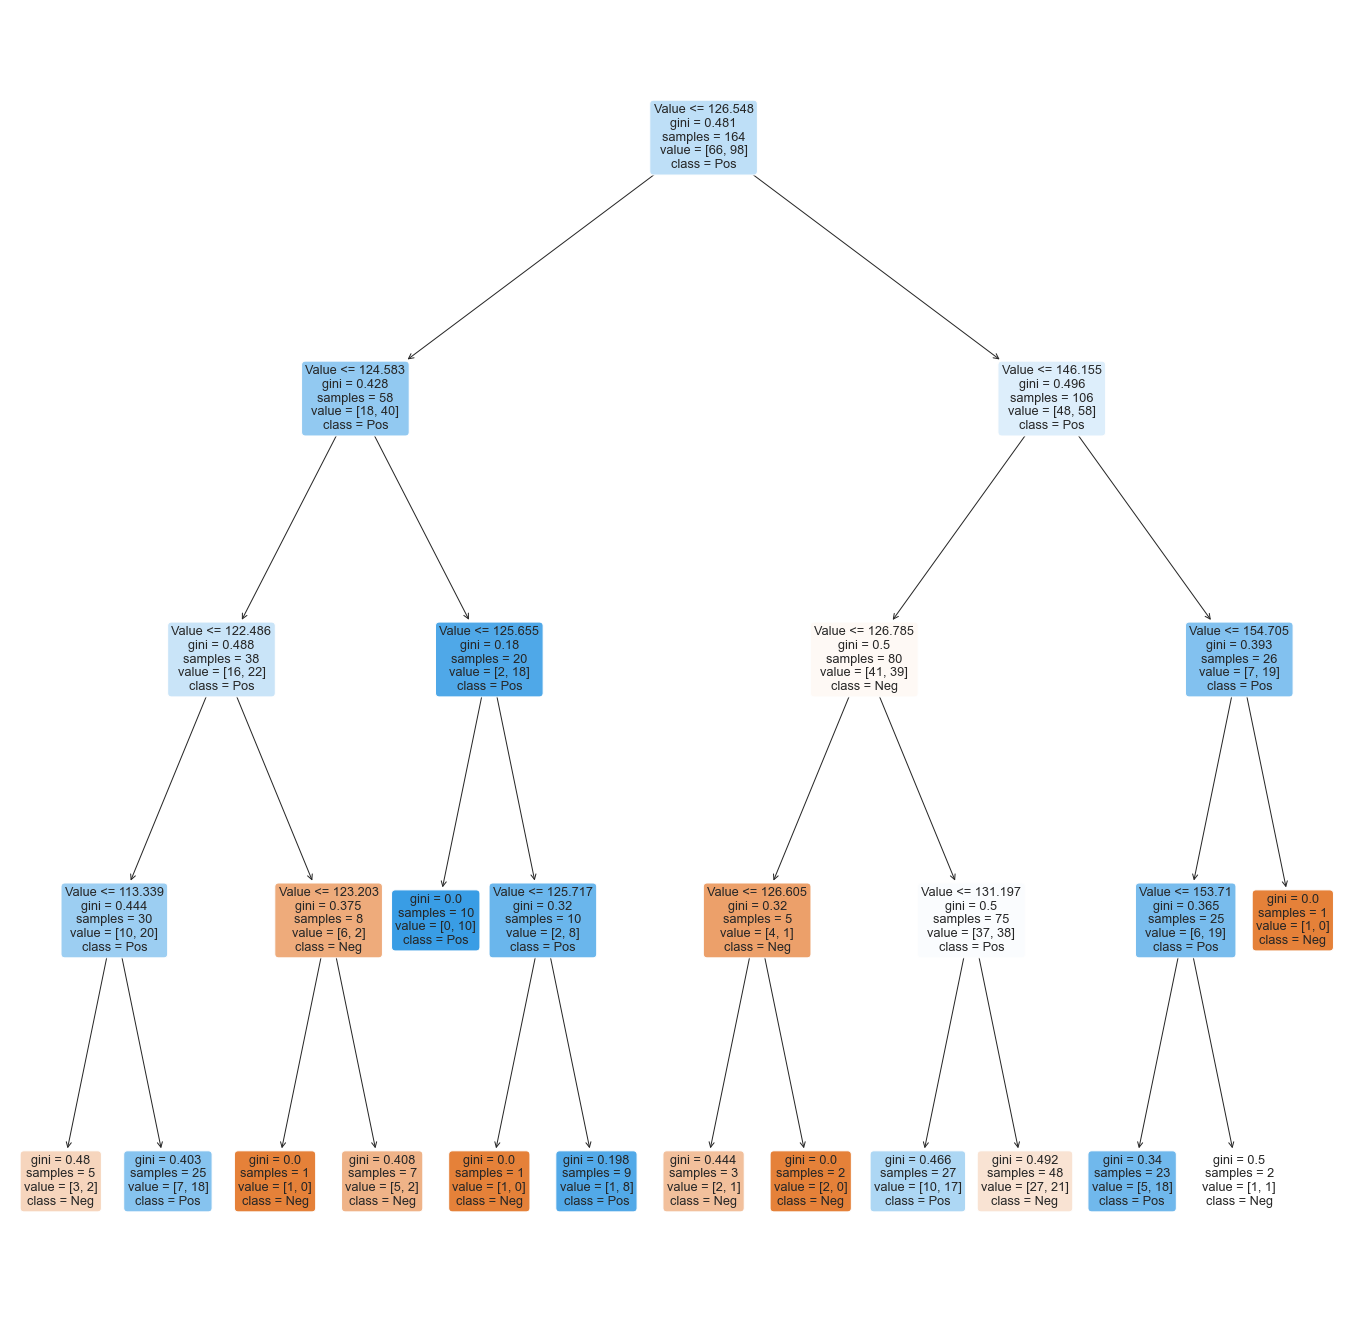

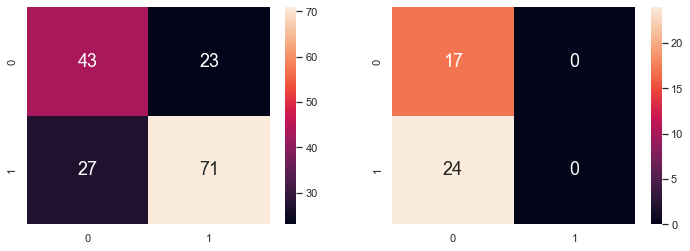

In [21]:
pred = Arima
#to match the output we reduce the train size
d = d.iloc[-164:]

x_train = pd.DataFrame(d['Adj Close'])
x_test = pd.DataFrame(pred['Price Prediction'])
y_train = pd.DataFrame(d['comp_score'])
y_test = pd.DataFrame(pred['comp_score'])



# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)
print()
Degree2()
Degree4()

Train Set : (164, 1) (164, 1)
Test Set  : (41, 1) (41, 1)

Degree2

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6097560975609756

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4146341463414634


Train set
True Positive Rate 	:  0.6020408163265306
False Positive Rate 	:  0.3787878787878788
Train set
True Positive Rate 	:  0.0
False Positive Rate 	:  0.0

Degree4

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6097560975609756

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4146341463414634


Train set
True Positive Rate 	:  0.7244897959183674
False Positive Rate 	:  0.3484848484848485
Train set
True Positive Rate 	:  0.0
False Positive Rate 	:  0.0


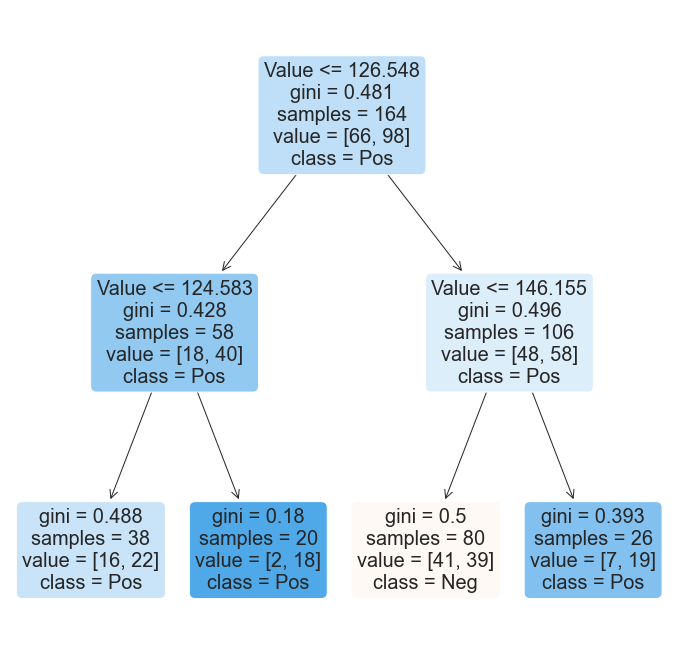

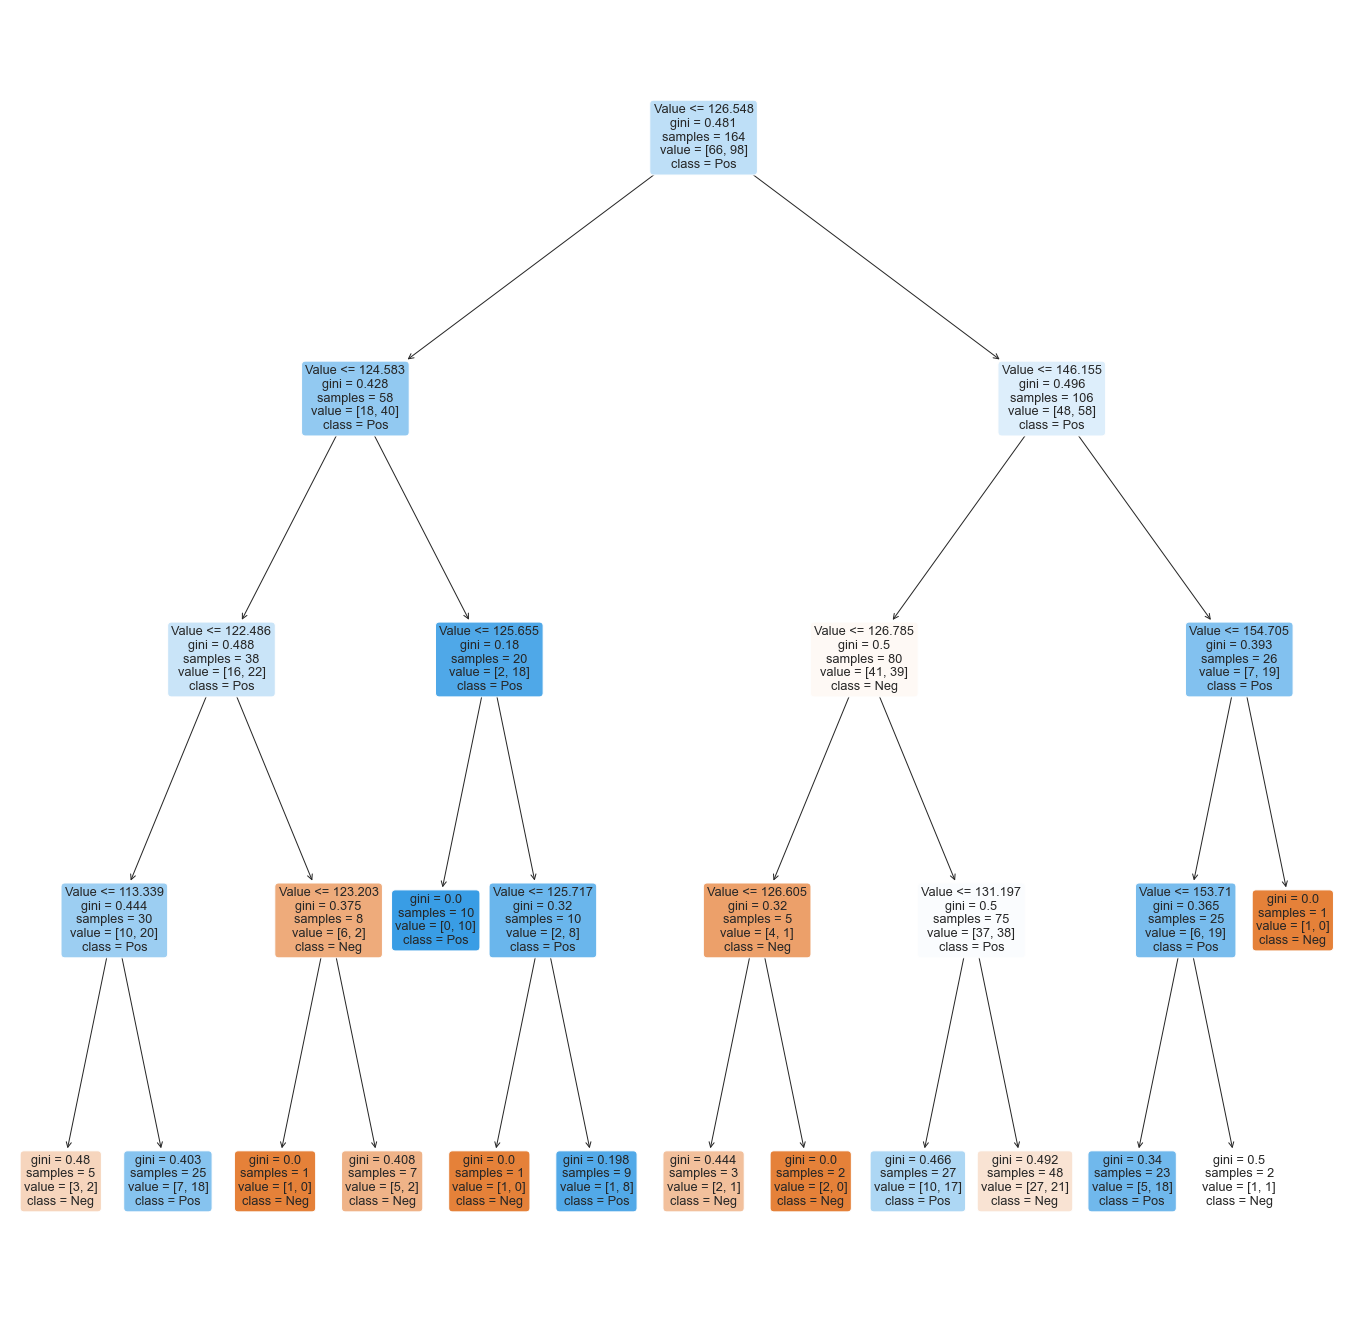

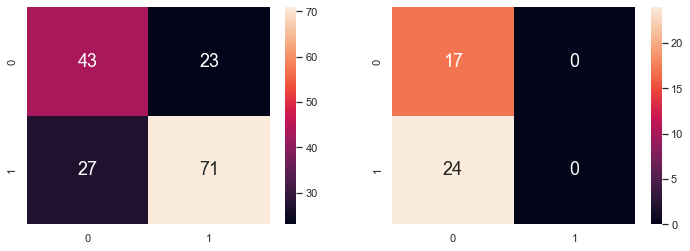

In [22]:
pred = LSTM
#to match the output we reduce the train size
d = d.iloc[-164:]

x_train = pd.DataFrame(d['Adj Close'])
x_test = pd.DataFrame(pred['Prediction'])
y_train = pd.DataFrame(d['comp_score'])
y_test = pd.DataFrame(pred['comp_score'])



# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)
print()
Degree2()
Degree4()

## Full Data (Ignore this)

Ignore This 

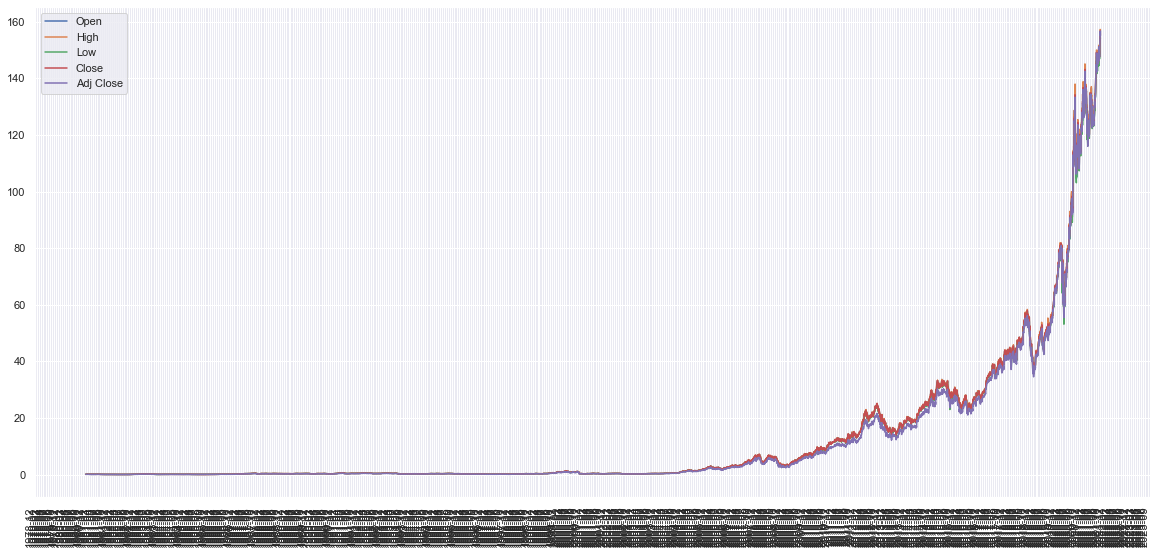

In [169]:
apo1 = apo[["Date","Open","High","Low","Close","Adj Close"]]

apo1.set_index('Date', inplace = True)
apo1.index = pd.to_datetime(apo1.index).date
ax = apo1.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xticks(rotation=90);

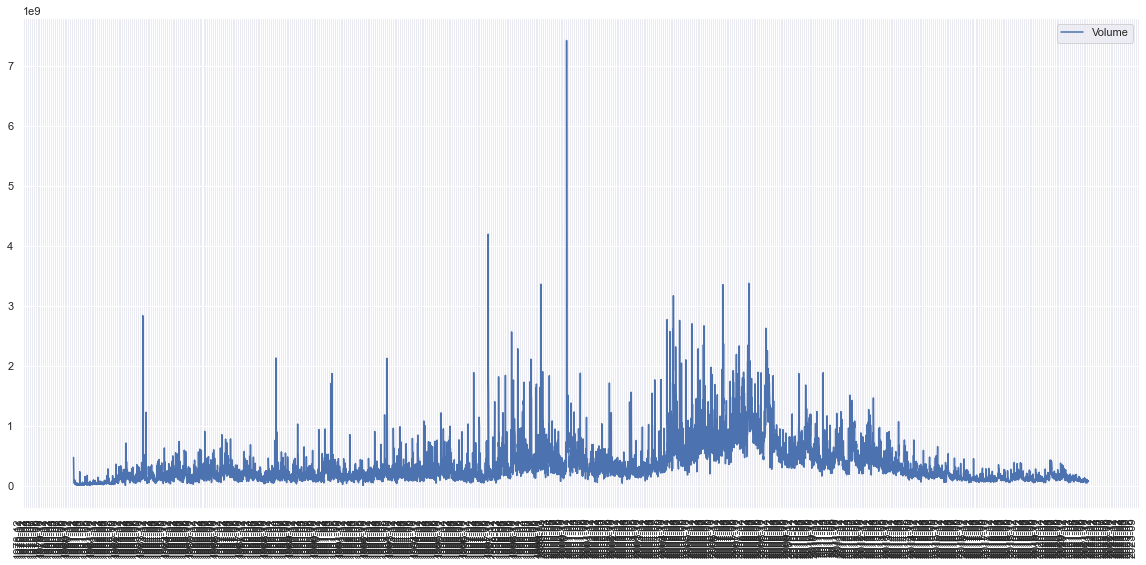

In [145]:
apo2 = apo[["Date","Volume"]]

apo2.set_index('Date', inplace = True)
apo2.index = pd.to_datetime(apo2.index).date
ax = apo2.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xticks( rotation=90);

In [ ]:

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cftr = confusion_matrix(y_train, y_train_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

cftr = confusion_matrix(y_test, y_test_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)